In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import math
import plotly.express as px
import plotly.graph_objects as go

from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from IPython.display import Image
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

In [3]:
custom_colors = ["#ff6b6b","#95d5b2","#a2d2ff","#72efdd"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

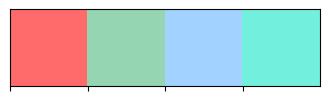

In [4]:
sns.palplot(sns.color_palette(custom_colors),size=1)

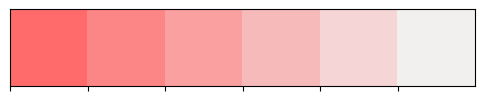

In [5]:
netflix_p = sns.light_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(netflix_p),size=1)

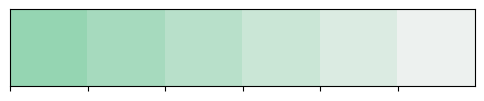

In [6]:
hulu_p = sns.light_palette(custom_colors[1], reverse=True)
sns.palplot(sns.color_palette(hulu_p),size=1)

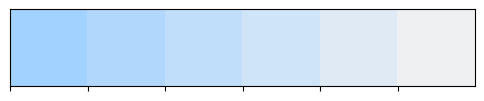

In [7]:

prime_p = sns.light_palette(custom_colors[2], reverse=True)
sns.palplot(sns.color_palette(prime_p),size=1)

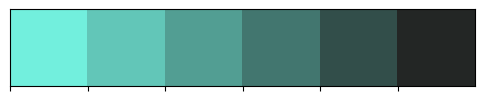

In [8]:
disney_p = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(disney_p),size=1)

In [9]:
df_movies = pd.read_csv('MoviesOnStreamingPlatforms.csv')

In [10]:
df_movies = df_movies.drop(['Unnamed: 0','ID'], axis = 1) 
df_movies.head(5)

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,The Irishman,2019,18+,98/100,1,0,0,0,0
1,Dangal,2016,7+,97/100,1,0,0,0,0
2,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,Roma,2018,18+,94/100,1,0,0,0,0


In [11]:
def splitting(dataframe,col):
    result = dataframe[col].str.get_dummies(',')
    print('Done!')
    return result

In [12]:
def val_sum(df,c):
    return df[c].sum(axis=0)

In [13]:
val_counts = []
dfs = [df_movies]
cols = ['Netflix','Hulu','Prime Video','Disney+']

for x in dfs:
    for y in cols:
        val_counts.append(val_sum(x,y))

In [14]:
val_counts

[3695, 1047, 4113, 922]

In [15]:
def donut(i,df,sizes,title):
    plt.subplot(i)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True)

    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title)
    plt.axis('equal')

val_counts: [3695, 1047, 4113, 922]
Length of val_counts: 4


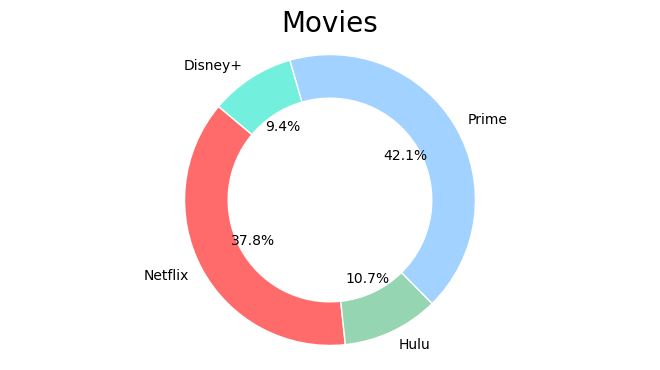

In [16]:
print("val_counts:", val_counts)
print("Length of val_counts:", len(val_counts))

fig, ax = plt.subplots(figsize=(16, 8))

labels = ['Netflix', 'Hulu', 'Prime', 'Disney+']
sizes = [val_counts[0], val_counts[1], val_counts[2], val_counts[3]]
colors = custom_colors
explode = (0, 0, 0, 0)

wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, wedgeprops=dict(width=0.3, edgecolor='w'))

ax.axis('equal')

plt.subplots_adjust(left=0.3, right=0.7, top=0.7, bottom=0.3)
plt.title('Movies', fontsize=20)
plt.show()

In [17]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


val_counts = [3695, 1047, 4113, 922]

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Indicator(
    mode = "number",
    value = val_counts[0],
    number = {'font':{'color': custom_colors[2],'size':100}},
    title = {"text": "Movies<br><span style='font-size:0.8em;color:gray'>On Netflix</span>"},
    domain = {'x': [0.5, 1], 'y': [0, 0.4]}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = val_counts[1],
    number = {'font':{'color': custom_colors[2],'size':100}},
    title = {"text": "Movies<br><span style='font-size:0.8em;color:gray'>On Hulu</span>"},
    domain = {'x': [0, 0.5], 'y': [0, 0.4]}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = val_counts[2],
    number = {'font':{'color': custom_colors[2],'size':100}},
    title = {"text": "Movies<br><span style='font-size:0.8em;color:gray'>On Prime</span>"},
    domain = {'x': [0, 0.5], 'y': [0.5, 1]}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = val_counts[3],
    number = {'font':{'color': custom_colors[2],'size':100}},
    title = {"text": "Movies<br><span style='font-size:0.8em;color:gray'>On Disney+</span>"},
    domain = {'x': [0.5, 1], 'y': [0.5, 1]}
))

fig.update_layout(height=800)
fig.show()

In [18]:
df_movies['Rotten Tomatoes'] = df_movies['Rotten Tomatoes'].str.split('/').str[0]

In [19]:
def kde(i,dataframe,platform,c):
    plt.subplot(i)
    dataframe=dataframe.loc[dataframe[platform] == 1]
    sns.kdeplot(data=dataframe['Runtime'], color=custom_colors[c],shade=True)
    plt.xlabel('Runtime in minutes', fontsize = 15)
    plt.legend(fontsize = 15);
    plt.subplot(i+1)
    sns.kdeplot(data=dataframe['Year'], color=custom_colors[c],shade=True)
    plt.xlabel('Release Year', fontsize = 15)
    plt.legend(fontsize = 15);

c:\Users\Ro\anaconda3\envs\dev\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Ro\anaconda3\envs\dev\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Ro\anaconda3\envs\dev\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Ro\anaconda3\envs\dev\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Ro\anaconda3\envs\dev\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is depre

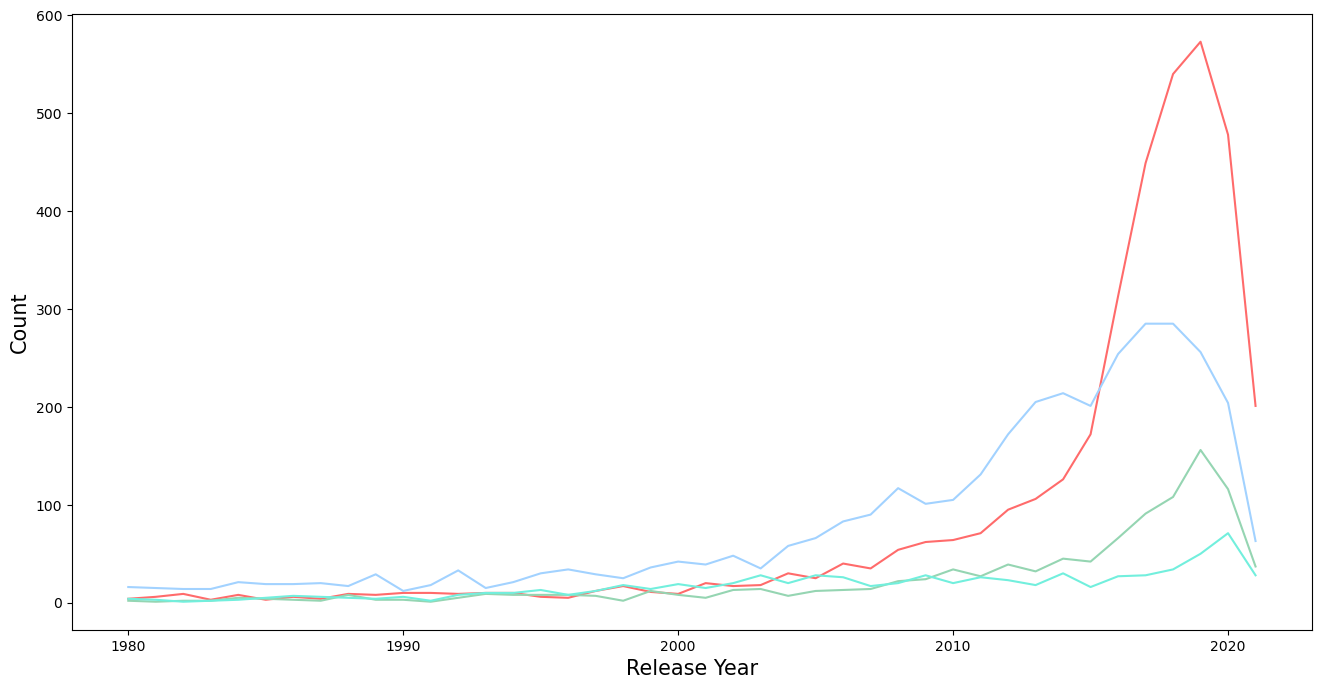

In [20]:
post_1980 = df_movies[df_movies.Year >= 1980]
year_movies = post_1980.groupby('Year')[['Netflix','Hulu','Prime Video','Disney+']].sum()

plt.figure(figsize = (16, 8))
sns.lineplot(x=year_movies.index,y=year_movies['Netflix'])
sns.lineplot(x=year_movies.index,y=year_movies['Hulu'])
sns.lineplot(x=year_movies.index,y=year_movies['Prime Video'])
sns.lineplot(x=year_movies.index,y=year_movies['Disney+'])
plt.xlabel('Release Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [21]:
def barplot(i,dataframe,platform,p):
    plt.subplot(i)
    dataframe=dataframe.loc[dataframe[platform] == 1]
    dataframe = dataframe['Age'].value_counts().reset_index()
    dataframe.columns=['age','count']
    sns.barplot(x="age", y="count", data=dataframe,palette=p)
    plt.xlabel('Age', fontsize = 15)
    plt.ylabel(platform, fontsize = 15)

In [22]:
r1 = df_movies.sort_values(by='Rotten Tomatoes', ascending=False)
r1 = r1[0:10]
r1['Movies']='Movies'
fig = px.treemap(r1, path=['Movies','Title'], values='Rotten Tomatoes',color='Rotten Tomatoes',color_continuous_scale='Purp')
fig.show()

In [23]:
df_m = df_movies.copy()
df_m = df_m.dropna()

df_m['Rotten Tomatoes']=df_m['Rotten Tomatoes'].str.replace('%','')
df_m['Rotten Tomatoes']=df_m['Rotten Tomatoes'].astype(str).astype(int)

In [24]:
df_m=df_m.sort_values(by='Rotten Tomatoes', ascending=False)
rating = df_m[0:20]

In [25]:
def dist(i,dataframe,platform,c):
    plt.subplot(i)
    dataframe=dataframe.loc[dataframe[platform] == 1]
    sns.distplot(dataframe['Rotten Tomatoes'], color=custom_colors[c],vertical=True)

C:\Users\Ro\AppData\Local\Temp\ipykernel_16652\592095497.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\Ro\anaconda3\envs\dev\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Ro\AppData\Local\Temp\ipykernel_16652\592095497.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updatin

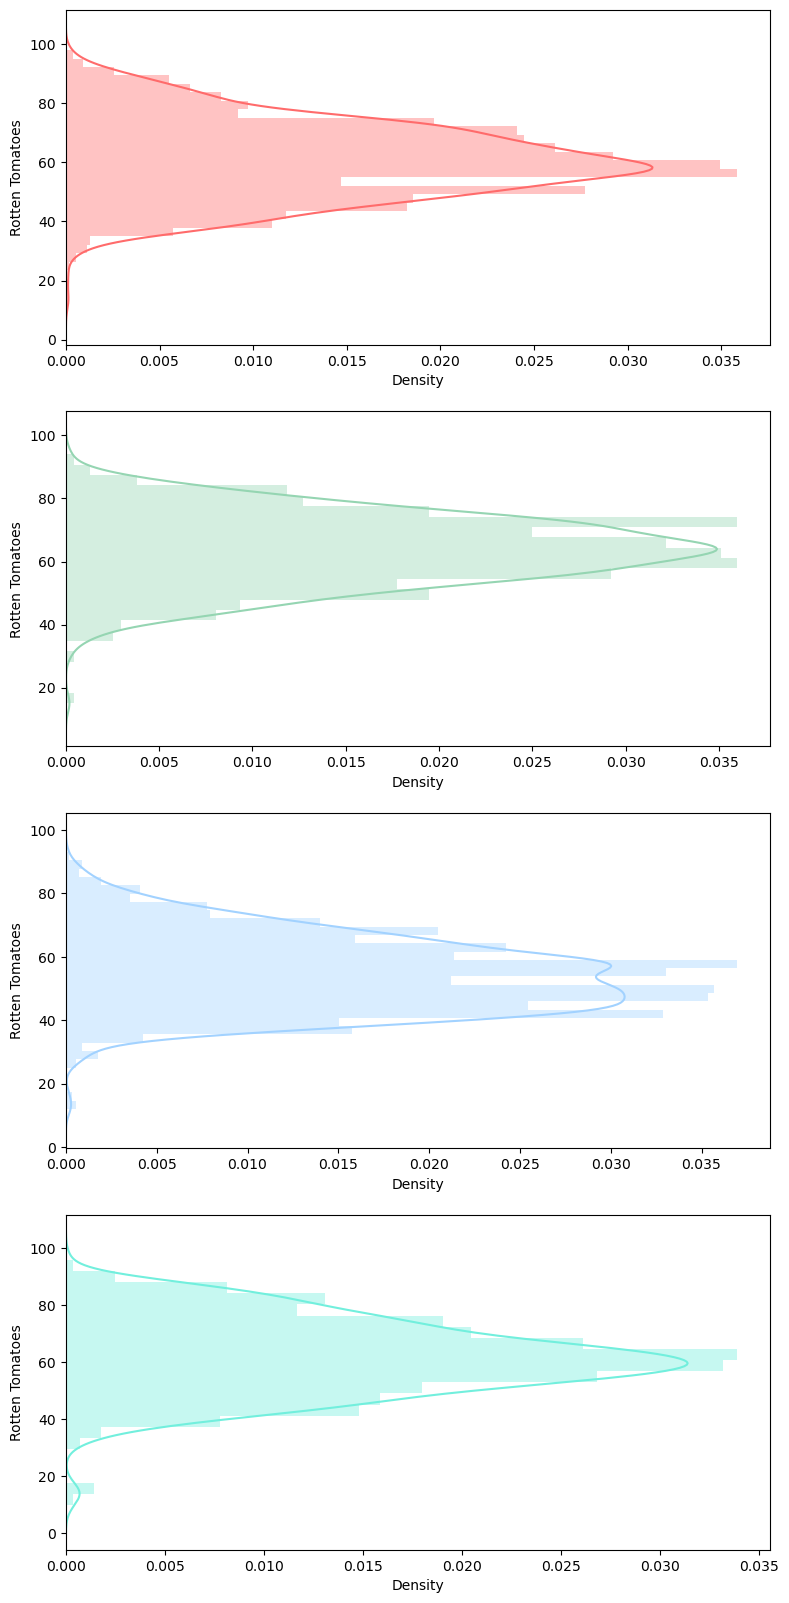

In [26]:
plt.figure(figsize = (20, 20))

dist(421,df_m,'Netflix',0)
dist(423,df_m,'Hulu',1)
dist(425,df_m,'Prime Video',2)
dist(427,df_m,'Disney+',3)

C:\Users\Ro\AppData\Local\Temp\ipykernel_16652\3491932878.py:16: UserWarning:



The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.


C:\Users\Ro\AppData\Local\Temp\ipykernel_16652\3491932878.py:16: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\Ro\anaconda3\envs\dev\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



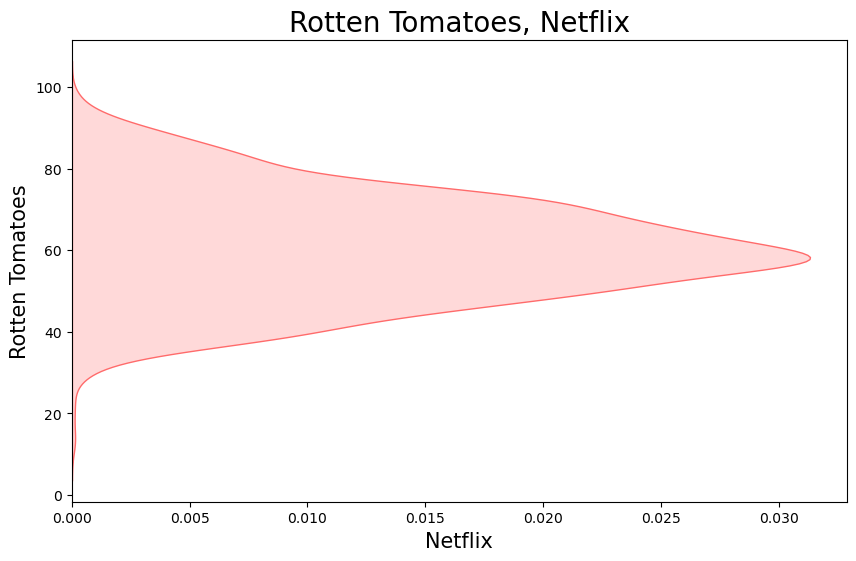

C:\Users\Ro\AppData\Local\Temp\ipykernel_16652\3491932878.py:16: UserWarning:



The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.


C:\Users\Ro\AppData\Local\Temp\ipykernel_16652\3491932878.py:16: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\Ro\anaconda3\envs\dev\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



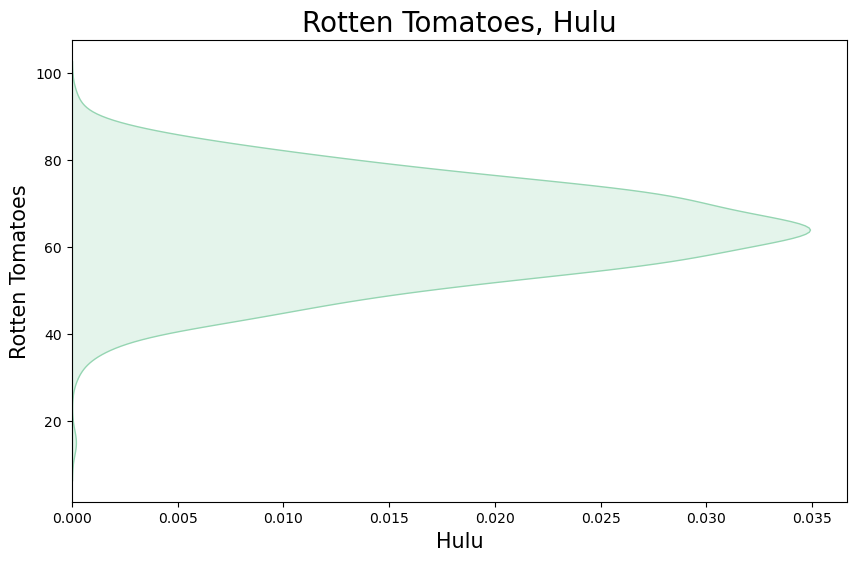

C:\Users\Ro\AppData\Local\Temp\ipykernel_16652\3491932878.py:16: UserWarning:



The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.


C:\Users\Ro\AppData\Local\Temp\ipykernel_16652\3491932878.py:16: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\Ro\anaconda3\envs\dev\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



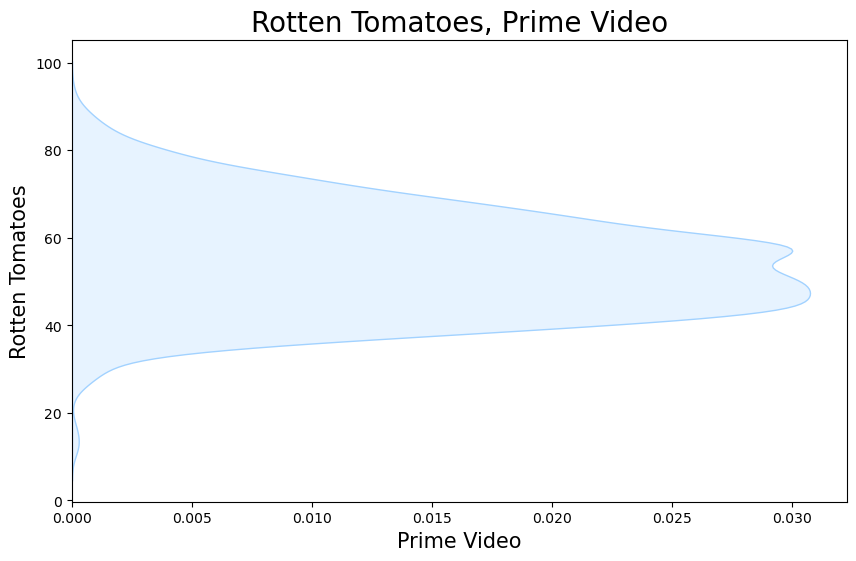

C:\Users\Ro\AppData\Local\Temp\ipykernel_16652\3491932878.py:16: UserWarning:



The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.


C:\Users\Ro\AppData\Local\Temp\ipykernel_16652\3491932878.py:16: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\Ro\anaconda3\envs\dev\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



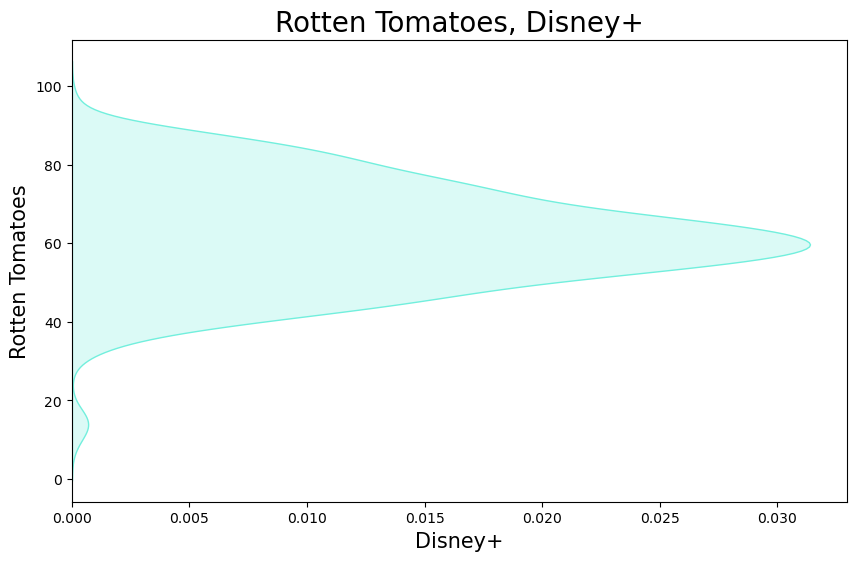

In [27]:
# Crear una copia del DataFrame y limpiar los datos
df_m = df_movies.copy()
df_m = df_m.dropna()

# Convertir la columna 'Rotten Tomatoes' a entero después de remover el símbolo '%'
df_m['Rotten Tomatoes'] = df_m['Rotten Tomatoes'].str.replace('%', '')
df_m['Rotten Tomatoes'] = df_m['Rotten Tomatoes'].astype(str).astype(int)

# Ordenar el DataFrame por 'Rotten Tomatoes'
df_m = df_m.sort_values(by='Rotten Tomatoes', ascending=False)
rating = df_m[:20]

# Definir la función para crear los gráficos
def dist(dataframe, platform, c):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(dataframe.loc[dataframe[platform] == 1]['Rotten Tomatoes'], shade=True, color=custom_colors[c], vertical=True)
    plt.ylabel('Rotten Tomatoes', fontsize=15)
    plt.xlabel(platform, fontsize=15)
    plt.title(f'Rotten Tomatoes, {platform}', fontsize=20)
    plt.show()

# Crear gráficos individuales para cada plataforma
dist(df_m, 'Netflix', 0)
dist(df_m, 'Hulu', 1)
dist(df_m, 'Prime Video', 2)
dist(df_m, 'Disney+', 3)
